##### Etapa 0: Importando pacotes e lendo dataset.

In [26]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('titanic-data-6.csv')

In [27]:
print('Amostra dos dados do dataset - Titanic')
titanic.head()

Amostra dos dados do dataset - Titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# Número de amostras do conjunto
print(f'Este conjunto tem: {titanic.shape[0]} linhas e {titanic.shape[1]} colunas.')

Este conjunto tem: 891 linhas e 12 colunas.


##### Etapa 1: Fazendo perguntas
- Quantos foram os que sobrevieram?
- Quantos foram os que morreram na catástrofe?
- Dentre os que sobreviveram, qual a média da idade?
- Dentre os que não sobreviveram, qual a média de idade?
- Qual a relação entre os sobreviventes e a classe de ingresso?
- Qual o sexo mais relevante entre os sobreviventes?
- Morreram mais pessoas do sexo feminino ou masculino?

##### Etapa 2: Limpando os dados - Wrangle

In [29]:
# Números de linhas duplicadas - Wrangle
print("Duplicadas - Titanic: {0}".format(titanic.duplicated().sum()))

Duplicadas - Titanic: 0


In [30]:
# Removendo colunas que não serão usadas - Wrangle
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

In [31]:
# Checando tipos das colunas - Wrangle
def check_types(df):
    for column in df.columns:
        print("coluna: {0}, tipo: {1}".format(column, type(df[column][0])))
check_types(titanic)

coluna: Survived, tipo: <class 'numpy.int64'>
coluna: Pclass, tipo: <class 'numpy.int64'>
coluna: Sex, tipo: <class 'str'>
coluna: Age, tipo: <class 'numpy.float64'>
coluna: SibSp, tipo: <class 'numpy.int64'>
coluna: Parch, tipo: <class 'numpy.int64'>
coluna: Embarked, tipo: <class 'str'>


In [32]:
# Verificando a ocorrência de elementos únicos em cada coluna - Wrangle
titanic.nunique()

Survived     2
Pclass       3
Sex          2
Age         88
SibSp        7
Parch        7
Embarked     3
dtype: int64

In [33]:
print(f'Valores -> Survived: {titanic["Survived"].unique()}')
print(f'Valores -> Pclass: {titanic["Pclass"].unique()}')
print(f'Valores -> Sex: {titanic["Sex"].unique()}')
print(f'Valores -> Age: {titanic["Age"].unique()}')
print(f'Valores -> SibSp: {titanic["SibSp"].unique()}')
print(f'Valores -> Parch: {titanic["Parch"].unique()}')
print(f'Valores -> Embarked: {titanic["Embarked"].unique()}')

Valores -> Survived: [0 1]
Valores -> Pclass: [3 1 2]
Valores -> Sex: ['male' 'female']
Valores -> Age: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Valores -> SibSp: [1 0 3 4 2 5 8]
Valores -> Parch: [0 1 2 5 3 4 6]
Valores -> Embarked: ['S' 'C' 'Q' nan]


In [34]:
# exiba a contagem de valores faltantes para cada característica - Wrangle
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [35]:
# descarte linhas com quaisquer valores nulos na coluna Embarked - Wrangle
titanic.dropna(subset=['Embarked'], inplace=True)
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64

In [36]:
# Substituindo valores nulos da idade pela média - Wrangle
media_idade = titanic['Age'].mean()
titanic['Age'].fillna(media_idade, inplace=True)
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [37]:
# Renomeando colunas para melhor entendimento - Wrangle
colunas = ['Sobreviveu', 'Classe', 'Sexo', 'Idade', 'Irmãos/Cônjugue', 'Pais/Crianças', 'Embarcou']
titanic.columns = colunas
titanic.head(1)

,Sobreviveu,Classe,Sexo,Idade,Irmãos/Cônjugue,Pais/Crianças,Embarcou
0,0,3,male,22.0,1,0,S


In [38]:
titanic['Sobreviveu'] = titanic['Sobreviveu'].replace([0, 1], ['Não', 'Sim'])
titanic['Classe'] = titanic['Classe'].replace([1, 2, 3], ['1st', '2st', '3st'])
titanic['Sexo'] = titanic['Sexo'].replace(['male', 'female'], ['masculino', 'feminino'])
titanic['Embarcou'] = titanic['Embarcou'].replace(['S', 'C', 'Q'], ['Cherbourg', 'Southampton', 'Queenstown'])
titanic.head()

,Sobreviveu,Classe,Sexo,Idade,Irmãos/Cônjugue,Pais/Crianças,Embarcou
0,Não,3st,masculino,22.0,1,0,Cherbourg
1,Sim,1st,feminino,38.0,1,0,Southampton
2,Sim,3st,feminino,26.0,0,0,Cherbourg
3,Sim,1st,feminino,35.0,1,0,Cherbourg
4,Não,3st,masculino,35.0,0,0,Cherbourg


In [39]:
check_types(titanic)

coluna: Sobreviveu, tipo: <class 'str'>
coluna: Classe, tipo: <class 'str'>
coluna: Sexo, tipo: <class 'str'>
coluna: Idade, tipo: <class 'numpy.float64'>
coluna: Irmãos/Cônjugue, tipo: <class 'numpy.int64'>
coluna: Pais/Crianças, tipo: <class 'numpy.int64'>
coluna: Embarcou, tipo: <class 'str'>


In [40]:
titanic.describe()

,Idade,Irmãos/Cônjugue,Pais/Crianças
count,889.000000,889.000000,889.000000
mean,29.642093,0.524184,0.382452
std,12.968346,1.103705,0.806761
min,0.420000,0.000000,0.000000
25%,22.000000,0.000000,0.000000
50%,29.642093,0.000000,0.000000
75%,35.000000,1.000000,0.000000
max,80.000000,8.000000,6.000000


##### Etapa 3: Explorando dados - Explore

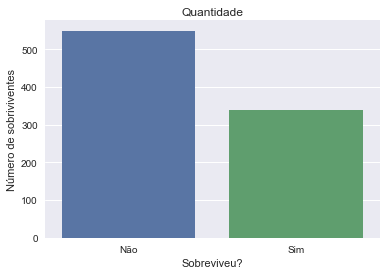

Sobreviveram 340 pessoas que estavam no titanic.
Morreram 549 pessoas que estavam no titanic.


In [41]:
# Quantos foram os que sobrevieram?
# Quantos foram os que morreram na catástrofe?

total = sns.countplot(data=titanic, x='Sobreviveu')
sns.set(style="darkgrid")

plt.title('Quantidade')
plt.xlabel('Sobreviveu?')
plt.ylabel('Número de sobriviventes')
plt.show()

# Criando dois novos dataframes - Um com a relação de todos os sobreviventes e Outro com a relação dos mortos
mortos_no_titanic = titanic.query('Sobreviveu == "Não"')
sobreviventes_no_titanic = titanic.query('Sobreviveu == "Sim"')

print(f'Sobreviveram {sobreviventes_no_titanic.shape[0]} pessoas que estavam no titanic.')
print(f'Morreram {mortos_no_titanic.shape[0]} pessoas que estavam no titanic.')


In [42]:
# Dentre os que sobreviveram, qual a média da idade?
# Dentre os que não sobreviram, qual a média de idade?

media_idade = titanic.groupby('Sobreviveu')['Idade'].mean()
media_idade


Sobreviveu
Não    30.402116
Sim    28.414879
Name: Idade, dtype: float64

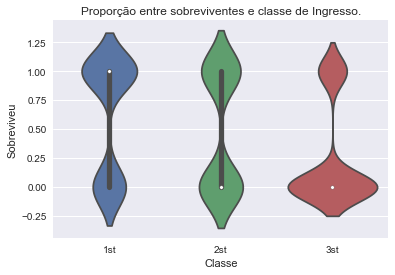

In [43]:
# Qual a relação entre os sobreviventes e a classe de ingresso?

# Criando novo dataset de sobreviventes, pois o violinplot reque o uso de pelo menos uma variavel númerica. 
# A logica abaixo força valores do tipo bool no campo Sobreviveu do dataset, o que é interpretado como 0 ou 1 pelo python
# 1 - Para sobreviventes e 0 para não sobreviventes

sobreviventes_classe = titanic.copy()
sobreviventes_classe['Sobreviveu'] = titanic['Sobreviveu'] == 'Sim'
sns.violinplot(data=sobreviventes_classe, y='Sobreviveu', x='Classe', order=["1st", "2st", '3st'], size=30)

plt.title('Proporção entre sobreviventes e classe de Ingresso.')
plt.show()

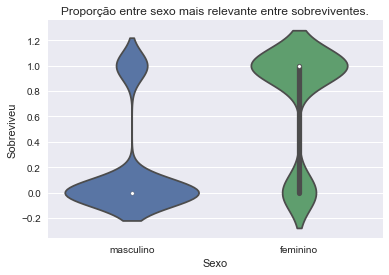

In [44]:
# Qual o sexo mais relevante entre os sobreviventes?

sobreviventes_classe = titanic.copy()
sobreviventes_classe['Sobreviveu'] = titanic['Sobreviveu'] == 'Sim'
sns.violinplot(data=sobreviventes_classe, y='Sobreviveu', x='Sexo', order=["masculino", "feminino"], size=30)

plt.title('Proporção entre sexo mais relevante entre sobreviventes.')
plt.show()

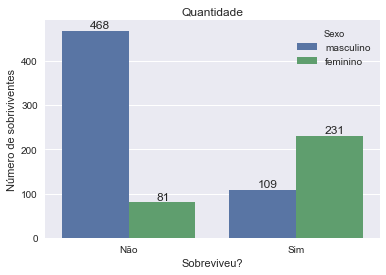

Pelo gráfico acima, verificamos que morreram mais pessoas do sexo masculino do que o feminino.


In [45]:
# Morreram mais pessoas do sexo feminino ou masculino?
passageiros = sns.countplot(data=titanic, x='Sobreviveu', hue='Sexo')

for i in passageiros.patches:
    b=i.get_bbox()
    passageiros.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 5))

plt.title('Quantidade')
plt.xlabel('Sobreviveu?')
plt.ylabel('Número de sobriviventes')
plt.show()

print('Pelo gráfico acima, verificamos que morreram mais pessoas do sexo masculino do que o feminino.')

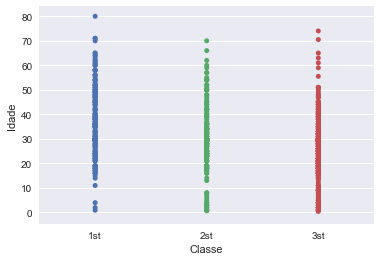

In [51]:
# Qual era a distribuição de idades por classe que existia na embarcação?
sns.stripplot(x="Classe", y="Idade", data=titanic, order=['1st','2st','3st']);